In [2]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras

In [3]:
data_dir=r'/Users/rahul/Downloads/knee/knee_dataset'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/rahul/Downloads/knee/knee_dataset')

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

848


In [6]:
yes = list(data_dir.glob('yes/*'))
no = list(data_dir.glob('no/*'))

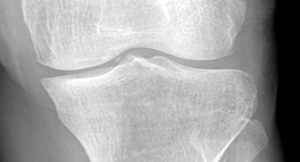

In [7]:
PIL.Image.open(str(no[32]))

In [8]:
Knee_Xray_dict = {
    'Disease': list(data_dir.glob('yes/*')),
    'no': list(data_dir.glob('no/*')),
}

In [9]:
Knee_label_dict = {
    'Disease': 0,
    'no': 1,
}

In [10]:
X, y = [], []

for X_ray, images in Knee_Xray_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(Knee_label_dict[X_ray])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [13]:
def normalize_in_batches(data, batch_size):
    num_samples = data.shape[0]
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        data[start:end] = data[start:end] / 255
    return data

X_train = normalize_in_batches(X_train.astype('float32'), batch_size=1000)
X_test = normalize_in_batches(X_test.astype('float32'), batch_size=1000)

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [15]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax'),
])

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [17]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15


/Users/rahul/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


28/28 [==============================] - 9s 320ms/step - loss: 0.8431 - accuracy: 0.5570
Epoch 2/15
28/28 [==============================] - 9s 324ms/step - loss: 0.6675 - accuracy: 0.5892
Epoch 3/15
28/28 [==============================] - 9s 338ms/step - loss: 0.6176 - accuracy: 0.6352
Epoch 4/15
28/28 [==============================] - 10s 360ms/step - loss: 0.6060 - accuracy: 0.6686
Epoch 5/15
28/28 [==============================] - 10s 368ms/step - loss: 0.5977 - accuracy: 0.6697
Epoch 6/15
28/28 [==============================] - 11s 379ms/step - loss: 0.5827 - accuracy: 0.6939
Epoch 7/15
28/28 [==============================] - 12s 438ms/step - loss: 0.5759 - accuracy: 0.6962
Epoch 8/15
28/28 [==============================] - 11s 388ms/step - loss: 0.5645 - accuracy: 0.6951
Epoch 9/15
28/28 [==============================] - 11s 396ms/step - loss: 0.5359 - accuracy: 0.7181
Epoch 10/15
28/28 [==============================] - 11s 391ms/step - loss: 0.5325 - accuracy: 0.7342
Epo

In [19]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 104ms/step - loss: 0.6688 - accuracy: 0.7890


[0.6687619090080261, 0.78899085521698]

(200, 200, 3)
1/1 [==============================] - 0s 47ms/step


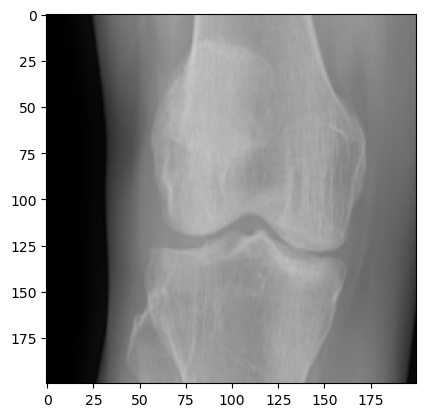

In [20]:
import cv2
import os
import matplotlib.pyplot as plt

file_path = r'/Users/rahul/Downloads/knee/knee_dataset/no/NormalG0 (97).png'

if os.path.exists(file_path):
    img = cv2.imread(file_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (200, 200))
        print(img.shape)
        plt.imshow(img,cmap=plt.cm.binary)
    else:
        print("Failed to load image.")
else:
    print("File does not exist at the specified path.")
    
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)


In [2]:
indexKnee_label_dict = {
            0: 'Osteoporosis Disease',
            1: 'no',
}

In [3]:
predicted_label = indexKnee_label_dict.get(index, "Unknown")
print(predicted_label)

NameError: name 'index' is not defined

In [23]:
import joblib
joblib.dump(model,'/Users/rahul/Downloads/brain_tumor_dataset/knee_prediction_model')

['/Users/rahul/Downloads/brain_tumor_dataset/knee_prediction_model']

1
